# Algorithms Exercise 1

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [2]:
def tokenize(s, stop_words=[] or '', punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    
    a = s.splitlines()
    
    b = []
    for n in a:
        b.append(n.split(' '))
    c = []
    for n in b:
        for m in n:
            c.append(m)
    e = []
    for n in c:
        e.append(n.lower())
    
    f = []
    
    for i in e:
        f.append(''.join([j for j in i if j not in punctuation]))
    
    d = []
    
    if type(stop_words) == list:
        for x in f:
            if x not in stop_words:
                d.append(x)
    if type(stop_words) == str:
        stp = stop_words.split()
        for x in f:
            if x not in stp:
                d.append(x)
    
    
    g = []
    for t in d:
        if t != '':
            g.append(t)
    return g

In [3]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [4]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    a = {}
    for n in data:
        if n in data:
            i = data.count(n)
            a[n] = i
    return a

In [5]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

Researched the items function from stack overflow

In [6]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    w = wc.items()
    q = sorted(w, key = lambda w: w[1], reverse=True)
    return q

In [7]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [8]:
f = open('mobydick_chapter1.txt','r')
r = f.read()
re = r.replace('--',' ')
tok = tokenize(re, stop_words = ['the', 'of', 'and', 'a', 'to', 'in', 'is', 'it', 'that', 'as'])
wcount = count_words(tok)
swc = sort_word_counts(wcount)
f.close()

In [9]:
print(len(swc))

837


In [10]:
assert swc[0]==('i',43)
assert len(swc)==848

AssertionError: 

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

In [11]:
top50 = []
for n in range(0,51):
    top50.append(swc[n])

In [15]:
lett = []
num = []
for n in top50:
    lett.append(n[0])
    num.append(n[1])

In [29]:
yax = range(0,51)    

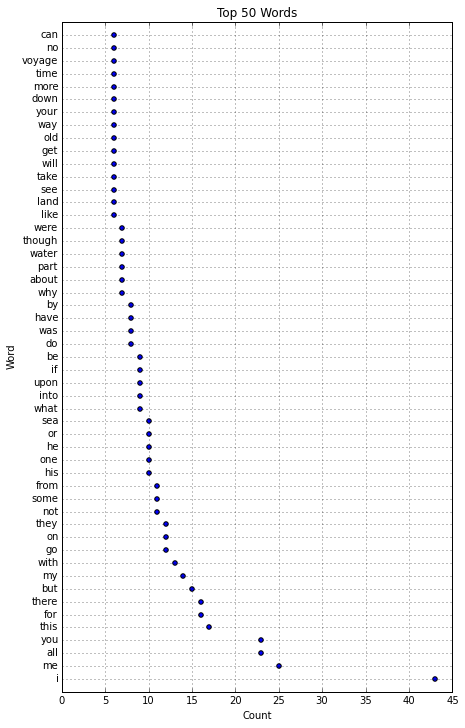

In [45]:
f = plt.figure(figsize=(7,12))
plt.scatter(num,yax)
plt.ylim(-1,51)
plt.yticks(range(0,51),lett)
plt.tick_params(right=False,left=False)
plt.title('Top 50 Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.grid(True);

In [ ]:
assert True # use this for grading the dotplot